El presente notebook tiene como objetivo el brindar aplicaciones de ejemplo de las ANN. Importante indicarse que los ejemplos y materiales fueron consultados de fuentes como tensorflow.org y scikit-learn.org

# Librerias

In [7]:
## Conjunto de librerias a usar

### En esta lista se trató de importar en lo posible de forma individual cada funcion o clase
### Además, se debe considerar que aqui se importaron librerias de codigos previos, por lo que
### muchas de las librerias importadas puede que no se usen o que falte optimizar aun más (limpiar/depurar)

#############################################################################################################################
### NOTA: Se reitera, no todo lo importado se usa o aplica. Asi mismo, falta limpiar/depurar algunas lineas de importacion
#############################################################################################################################

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import joblib
from IPython.display import Image
import sklearn as skl
from IPython import display
import os
import PIL
from tensorflow.keras import layers
import time
import scipy
import sys
from mpl_toolkits.mplot3d import Axes3D
import math
import pickle
from scipy import stats

# Clonar modelos creados
from sklearn.base import clone 

## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV

## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing

## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# Ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Reduction of Dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

# Unsupervised learning
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics.cluster import adjusted_rand_score

## Machine Learning - Deep Learning
import tensorflow as tf
from tensorflow import keras
from functools import partial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN para Scikit
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias

## fin

In [6]:
# ver version de tf y keras

print(tf.__version__)
print(keras.__version__)

# fin

2.6.0
2.6.0


# Regresion NN (Scikit Learn + Keras)

<br><br><b>Importante !!!</b>: Es vital tener en cuenta que si lo que se quiere es convertir un modelo <b>Keras</b> a uno tipo <b>Scikit</b> para poder aplicar sus bondades como es el GridSearchCV, no se puede usar todos los modelos de Keras, el recomendado o unica opcion es usar <b>keras.Sequential()</b> esto debido a que para el Clasificador le brinda acceso al calculo mediante <b>modelo.predic_proba</b> y <b>modelo.predic</b>, estos son fundamentales en el calculo una vez entrenado (fit) el modelo a los datos.<br><br>

## Regresion 

In [104]:
# Cargar datos

housing = fetch_california_housing()

# dividir los datos en conjuntos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# estandarizar los datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)
X_test_s = scaler.transform(X_test)

print('\n\nX_train shape: ', X_train_s.shape)
print('X_valid shape: ', X_valid_s.shape)
print('X_test shape: ', X_test_s.shape)
print('-------------')
print('y_train shape: ', y_train.shape)
print('y_valid shape: ', y_valid.shape)
print('y_test shape: ', y_test.shape)
print('\n')

# fin



X_train shape:  (11610, 8)
X_valid shape:  (3870, 8)
X_test shape:  (5160, 8)
-------------
y_train shape:  (11610,)
y_valid shape:  (3870,)
y_test shape:  (5160,)




### definir modelo

In [105]:
# Modelo

model_reg = MLPRegressor((100,60,30),
                      activation='logistic',
                      solver='sgd',
                      random_state=42,
                      batch_size = 'auto',
                      max_iter=300,
                      verbose=True,
                      early_stopping=True,
                      learning_rate_init = 0.2,
                      power_t = 0.9,
                      alpha = 0.01, 
                      shuffle=True,
                      epsilon=1e-10,
                      tol=1e-10,
                      n_iter_no_change=15,
                      validation_fraction=0.1)

model_reg.fit(X_train_s,y_train)

valor = model_reg.score(X_test_s,y_test)

print('n\Fin entrenamiento')
print('R^2 modelo:' ,valor)

# fin

Iteration 1, loss = 0.80951477
Validation score: -0.013174
Iteration 2, loss = 0.72109949
Validation score: -0.013754
Iteration 3, loss = 0.70458694
Validation score: -0.015687
Iteration 4, loss = 0.69740345
Validation score: -0.009356
Iteration 5, loss = 0.68612880
Validation score: -0.003990
Iteration 6, loss = 0.68242209
Validation score: -0.027999
Iteration 7, loss = 0.68017747
Validation score: -0.020010
Iteration 8, loss = 0.30079553
Validation score: 0.660442
Iteration 9, loss = 0.23242067
Validation score: 0.578564
Iteration 10, loss = 0.23161566
Validation score: 0.670363
Iteration 11, loss = 0.22849354
Validation score: 0.656691
Iteration 12, loss = 0.22458844
Validation score: 0.650202
Iteration 13, loss = 0.22633501
Validation score: 0.622384
Iteration 14, loss = 0.22354506
Validation score: 0.669487
Iteration 15, loss = 0.22150550
Validation score: 0.684103
Iteration 16, loss = 0.22237133
Validation score: 0.675843
Iteration 17, loss = 0.22049829
Validation score: 0.678381

### ver parametros y ajuste del modelo entrenado



----------------------
R^2 del modelo:  75.866 %
Funcion activacion:  identity
Cantidad de capas:  identity
Numero iteraciones:  106
Cantidad datos usados:  1107594


----------------------


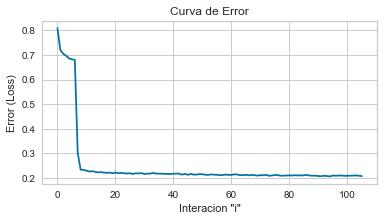



Ver capas entrenadas: 
---------------------

Capa N°  1
Dimension:  (8, 100)


[[-9.15237349e-02 -3.74483436e-02 -6.50874774e-02 -6.36353540e-02
  -5.93822720e-02 -1.27812667e-01 -1.04961735e+00 -2.37227910e-02
   1.10271116e-01 -6.17699447e-02 -1.03705673e-01 -7.37629704e-02
  -3.92229727e-02 -3.83419488e-01 -4.39463805e-01 -9.19296219e-02
  -7.81864747e-02 -7.85523741e-02 -8.96038138e-02 -8.46149470e-02
  -5.06470508e-02 -6.66873253e-02 -8.45007472e-02 -1.05014645e+00
  -9.25133752e-02 -9.35119562e-02 -3.94947497e-02 -8.82790565e-02
  -8.46914187e-02 -5.77732284e-01 -7.67133993e-02 -6.72869132e-01
  -9.89402996e-02 -5.34062904e-02  6.27908811e-01 -7.92128290e-02
  -1.22434159e-01 -9.58329802e-02 -8.68258575e-02 -8.12698089e-02
  -8.54357912e-02 -8.48901244e-02 -5.12385171e-02 -6.09924093e-02
  -1.01417068e-01 -9.96617860e-02 -8.94508752e-02 -7.98885641e-02
  -9.35882549e-02 -9.75984794e-02 -3.85482338e-02 -1.04065813e-01
   6.93886455e-01 -8.61565858e-02 -7.01007306e-02 -6.0691603

In [106]:
# Ver detalles de parametros y ajustes del modelo entrenado

print('\n\n----------------------')
print('R^2 del modelo: ',np.round(valor*100.0,3),'%')
print('Funcion activacion: ',model_reg.out_activation_)
print('Cantidad de capas: ',model_reg.n_layers_)
print('Numero iteraciones: ',model_reg.n_iter_)
print('Cantidad datos usados: ',model_reg.t_)

############################################################

# Curvas de Error (durante entrenamiento)

loss_curve = model_reg.loss_curve_

print('\n\n----------------------')
plt.figure(figsize=(6,3))
plt.title('Curva de Error')
plt.xlabel('Interacion "i"')
plt.ylabel('Error (Loss)')
plt.plot(loss_curve)
plt.show()

############################################################

# Pesos de capas de neuronas

capas = model_reg.coefs_

i = 1
print('\n\nVer capas entrenadas: ')
print('---------------------\n')
for capa in capas:
    print('Capa N° ',i)
    print('Dimension: ',capa.shape)
    print('\n')
    print(capa)
    i +=1
    print('\n\n**********************')
    
    
# fin     

### prediccion/validacion con el modelo

In [107]:
# Prediccion

valor = model_reg.score(X_test_s,y_test)
print('\nR^2 de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test_s.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(model_reg.predict(X_test_s[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin


R^2 de modelo: 75.87 %
------------------------------

Valores de Prediccion: 
[2.041 1.743 2.479 5.178 0.864 0.871 1.644 2.65  1.411 3.701]

Valores Orginales: 
[1.531 1.47  3.277 5.    0.919 2.194 1.371 2.938 1.116 1.838]





## Regresor con Pipeline + GridSearchCV

In [ ]:
# modelo con pipeline

# cargar datos
housing = fetch_california_housing()

# cargar datos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

print('\n')
print('Dim X train: ',X_train_full.shape)
print('Dim Y train: ',y_train_full.shape)
print('\n')

# Definir modelo de regression por ANN (modelo inicial)
model = MLPRegressor((100,60,30),
                      activation='logistic',
                      solver='sgd',
                      random_state=42,
                      batch_size = 'auto',
                      max_iter=300,
                      verbose=True,
                      early_stopping=True,
                      learning_rate_init = 0.2,
                      power_t = 0.9,
                      alpha = 0.01, 
                      shuffle=True,
                      epsilon=1e-10,
                      tol=1e-8,
                      n_iter_no_change=15,
                      validation_fraction=0.2)

# Definir Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('reg', model)])

# Grilla de busqueda de mejores parametros para la ANN
param_grid = {
    'reg__hidden_layer_sizes': [(50,20,10),(80,20),(20,10)],
    'reg__activation': ['tanh','logistic'],
    'reg__alpha': [0.0001, 0.05]}

# Gridsearch CV
search = GridSearchCV(pipe, param_grid,cv=3)

# entrenar modelos y busqueda mediante GridSearchCV
search.fit(X_train_full, y_train_full)

# ver ajuste del modelo entrenado
valor = search.score(X_test,y_test)

# Mejores parametros
print('\n\n----------------------------')
print('Mejores parametros: ')
print(search.best_params_)
print('R^2 modelo:' ,np.round(valor*100.0,3),'%')
print('\n\n')

# fin

In [135]:
# Prediccion

valor = search.score(X_test,y_test)
print('\nR^2 de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(search.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin


R^2 de modelo: 78.66 %
------------------------------

Valores de Prediccion: 
[2.554 1.379 2.143 1.509 1.075 1.453 1.668 1.24  1.06  2.201]

Valores Orginales: 
[0.55  2.033 1.984 1.421 0.987 1.431 1.628 0.948 1.073 2.178]





# Regresor con Keras + Scikit (Con GridSearchCV & Opcion Multicapas)

<br><br><b>Importante !!!</b>: Es vital tener en cuenta que si lo que se quiere es convertir un modelo <b>Keras</b> a uno tipo <b>Scikit</b> para poder aplicar sus bondades como es el GridSearchCV, no se puede usar todos los modelos de Keras, el recomendado o unica opcion es usar <b>keras.Sequential()</b> esto debido a que para el Clasificador le brinda acceso al calculo mediante <b>modelo.predic_proba</b> y <b>modelo.predic</b>, estos son fundamentales en el calculo una vez entrenado (fit) el modelo a los datos.<br><br>

### Opcion 01 - con keras.Sequential() - (Sin GridSearchCV & Sin Opcion Multicapa)

In [69]:
# modelo keras

# cargar datos
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit + transform
X_test = scaler.transform(X_test) # transform (usando entrenado)

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',y_train.shape)
print('\n')

##############################################################################################################################

dimension = X_train.shape[1:]

def crear_modelo(): 
    # modelo secuencial
    modeli = keras.Sequential()
    modeli.add(Dense(80,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=dimension))
    modeli.add(Dense(50,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=keras.regularizers.l2(0.001)))
    modeli.add(Dense(20,activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer=keras.regularizers.l2(0.001)))
    modeli.add(Dense(1))
    
    #compilar y retornar objeto modelo
    modeli.compile(loss='mse', optimizer = 'sgd',metrics=['mse'])
    return modeli

# Callbacks para el entrenamiento
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)


# Parametros de entrenamiento
epochs = 100
#batch_size = 128
shuffle =True
callbacks = [chk,stp,lrs]

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasRegressor(crear_modelo,epochs=epochs,callbacks=callbacks,shuffle=True,validation_split=0.2)

# entrenar modelo
history = model.fit(X_train, y_train)

#############################################################
####### Ver curvas de Aprendizaje del modelo #############

historia = history.history

print('\n\nCurvas de Aprendizaje\n')
for nombre,valores in historia.items():
    plt.figure(figsize=(8,3))
    plt.title('Curva de ' + nombre)
    plt.xlabel('Interacion "i"')
    plt.ylabel(nombre)
    plt.plot(valores)
    plt.show()

##############################################################

# test de rendimiento - mse
mse_total = model.score(X_test,y_test)
print('\n\nPuntaje total: ',mse_total)

# fin



Dim X train:  (15480, 8)
Dim Y train:  (15480,)


Train on 12384 samples, validate on 3096 samples
Epoch 1/100
11872/12384 [===========================>..] - ETA: 0s - loss: 0.9750 - mse: 0.8674
Epoch 00001: val_loss improved from inf to 0.60488, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 90us/sample - loss: 0.9597 - mse: 0.8520 - val_loss: 0.6049 - val_mse: 0.4955
Epoch 2/100
12256/12384 [============================>.] - ETA: 0s - loss: 0.5982 - mse: 0.4893
Epoch 00002: val_loss improved from 0.60488 to 0.49296, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 73us/sample - loss: 0.5975 - mse: 0.4886 - val_loss: 0.4930 - val_mse: 0.3850
Epoch 3/100
11680/12384 [===========================>..] - ETA: 0s - loss: 0.5178 - mse: 0.4103
Epoch 00003: val_loss improved from 0.49296 to 0.46991, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 70us/sample - l

In [70]:
# Prediccion con modelo

valor = model.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor,2))
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(model.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

5160/5160 [==============================] - 0s 54us/sample - loss: 0.3383 - mse: 0.2886

Puntaje de modelo: -0.34
------------------------------

Valores de Prediccion: 
[4.908 1.02  1.275 2.347 0.879 1.512 1.101 2.153 1.503 1.516]

Valores Orginales: 
[5.    1.185 1.16  2.295 0.621 1.612 0.981 2.683 1.584 1.555]





### Opcion 02 - con keras.add()  - (Sin GridSearchCV &  Sin Opcion Multicapa)

In [65]:
# modelo keras

# cargar datos
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit + transform
X_test = scaler.transform(X_test) # transform (usando entrenado)

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',y_train.shape)
print('\n')

##############################################################################################################################

dimension = X_train.shape[1:]

def crear_modelo(): 
    # modelo secuencial
    input=keras.layers.Input(shape=X_train_full.shape[1:],name='i')
    hidden1=keras.layers.Dense(80,name='h1',activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(input)
    hidden2=keras.layers.Dense(50,name='h2',activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden1)
    hidden3=keras.layers.Dense(20,name='h3',activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden2)
    output=keras.layers.Dense(1,name='out')(hidden3) # salida
    modeli=keras.models.Model(inputs=[input],outputs=[output]) ## definir entradas y salidas
    
    #compilar y retornar objeto modelo
    modeli.compile(loss='mse', optimizer = 'sgd',metrics=['mse'])
    return modeli

##############################################################################################################################

# Callbacks para el entrenamiento
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)

# Parametros de entrenamiento
epochs = 100
#batch_size = 128
shuffle =True
callbacks = [chk,stp,lrs]

##############################################################################################################################

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasRegressor(crear_modelo,epochs=epochs,callbacks=callbacks,shuffle=True,validation_split=0.2)

# entrenar modelo
history = model.fit(X_train, y_train)

#############################################################
####### Ver curvas de Aprendizaje del modelo #############

historia = history.history

print('\n\nCurvas de Aprendizaje\n')
for nombre,valores in historia.items():
    plt.figure(figsize=(8,3))
    plt.title('Curva de ' + nombre)
    plt.xlabel('Interacion "i"')
    plt.ylabel(nombre)
    plt.plot(valores)
    plt.show()

##############################################################

# test de rendimiento - mse
mse_total = model.score(X_test,y_test)
print('\n\nPuntaje total: ',mse_total)

# fin



Dim X train:  (15480, 8)
Dim Y train:  (15480,)


Train on 12384 samples, validate on 3096 samples
Epoch 1/100
11456/12384 [==========================>...] - ETA: 0s - loss: 1.0062 - mse: 0.9014- ETA: 0s - loss: 1.0849 - mse: 0.9 - ETA: 0s - loss: 0.9758 - mse: 0.8708
Epoch 00001: val_loss improved from inf to 0.60850, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 87us/sample - loss: 0.9431 - mse: 0.8379 - val_loss: 0.6085 - val_mse: 0.5013
Epoch 2/100
12000/12384 [============================>.] - ETA: 0s - loss: 0.7269 - mse: 0.6202
Epoch 00002: val_loss improved from 0.60850 to 0.60007, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 69us/sample - loss: 0.7249 - mse: 0.6182 - val_loss: 0.6001 - val_mse: 0.4938
Epoch 3/100
11744/12384 [===========================>..] - ETA: 0s - loss: 0.5301 - mse: 0.4243
Epoch 00003: val_loss improved from 0.60007 to 0.54422, saving model to mejor_modelo_entr

In [68]:
# Prediccion

valor = model.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor,2))
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(model.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

5160/5160 [==============================] - 0s 52us/sample - loss: 0.3159 - mse: 0.26340s - loss: 0.3155 - mse: 0.263

Puntaje de modelo: -0.32
------------------------------

Valores de Prediccion: 
[2.537 1.006 2.325 0.61  1.809 2.086 0.473 1.813 1.995 1.491]

Valores Orginales: 
[2.609 0.766 1.809 0.669 1.827 2.393 0.541 1.796 1.739 1.635]





### Opcion 03 -  Keras  - Opcion Multicapas



Dim X train:  (15480, 8)
Dim Y train:  (15480,)


Train on 12384 samples, validate on 3096 samples
Epoch 1/40
12160/12384 [============================>.] - ETA: 0s - loss: 1.2059 - mse: 1.1435
Epoch 00001: val_loss improved from inf to 0.72979, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 103us/sample - loss: 1.2022 - mse: 1.1398 - val_loss: 0.7298 - val_mse: 0.6693
Epoch 2/40
12192/12384 [============================>.] - ETA: 0s - loss: 0.9776 - mse: 0.9184
Epoch 00002: val_loss improved from 0.72979 to 0.70658, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 74us/sample - loss: 0.9789 - mse: 0.9197 - val_loss: 0.7066 - val_mse: 0.6484
Epoch 3/40
12192/12384 [============================>.] - ETA: 0s - loss: 0.9303 - mse: 0.8731
Epoch 00003: val_loss improved from 0.70658 to 0.66253, saving model to mejor_modelo_entrenado.h5
12384/12384 [==============================] - 1s 79us/sample - los

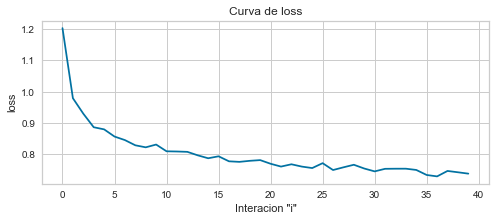

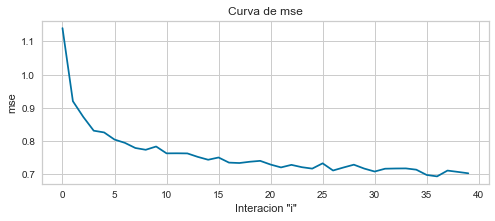

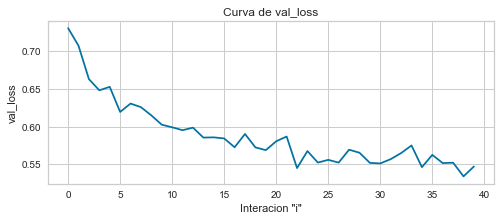

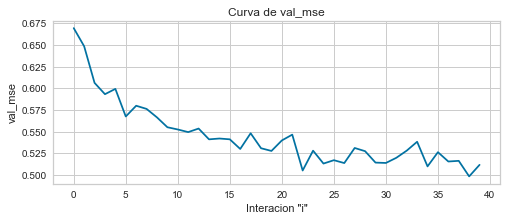

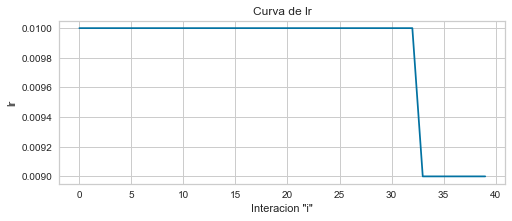

5160/5160 [==============================] - 0s 50us/sample - loss: 0.5639 - mse: 0.5281


Puntaje total:  -0.5639362792636073




In [20]:
# modelo keras

# cargar datos
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# estandarizar los datos ... es vital para entrenamiento inicial, en otro caso puede diverger los pesos del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit + transform
X_test = scaler.transform(X_test) # transform (usando entrenado)

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',y_train.shape)
print('\n')

##############################################################################################################################

# dimension entrada...se indica en la primera capa de la NN
dimension = X_train.shape[1:]

def crear_modelo_deep(optimizer='sgd',h=[30,40,10,1],activa=['tanh','tanh','tanh',None],init ='glorot_uniform',alpha=0.001,dropout=0.2): 
    
    # Funcion de activacion "None" equivale a decirle que la activacion es la funcion lineal a(x)=x ... es la funcion lineal pura
    
    # modelo secuencial
    modeli = keras.Sequential()
    
    # definir dimension de entradas
    modeli.add(keras.Input(shape=(dimension)))
    
    # De la primera capa a la penultima
    for ix in range(len(h)-1):
        # capa
        modeli.add(Dense(h[ix],activation=activa[ix],kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))

        # Agregar capa de Drop-Out a capas intermedias con un ratio igual a "dropout"=probabilidad desactivacion de neurona aleatoreamente
        modeli.add(keras.layers.Dropout(rate=dropout))
    
    # Capa de salida o final
    modeli.add(Dense(h[-1],activation=activa[-1]))

    #compilar y retornar objeto modelo
    modeli.compile(loss='mse', optimizer = optimizer ,metrics=['mse'])
    return modeli

##############################################################################################################################

# Callbacks para el entrenamiento
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=10,verbose=2)


# Parametros de entrenamiento
epochs = 20
dropout= 0.2 # desactivacion/activacion aleatoria de neuronas durante entrenamiento
batch_size = 128
shuffle =True
callbacks = [chk,stp,lrs]

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasRegressor(crear_modelo_deep,epochs=epochs,callbacks=callbacks,shuffle=True,validation_split=0.2,dropout=dropout)

# entrenar modelo
history = model.fit(X_train, y_train)

#############################################################
####### Ver curvas de Aprendizaje del modelo #############

historia = history.history

print('\n\nCurvas de Aprendizaje\n')
for nombre,valores in historia.items():
    plt.figure(figsize=(8,3))
    plt.title('Curva de ' + nombre)
    plt.xlabel('Interacion "i"')
    plt.ylabel(nombre)
    plt.plot(valores)
    plt.show()

##############################################################

# test de rendimiento - mse
puntaje = model.score(X_test,y_test)
print('\n\nPuntaje total: ',puntaje)
print('\n')

# fin

In [21]:
# Prediccion

valor = model.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor,3))
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(model.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

5160/5160 [==============================] - 0s 53us/sample - loss: 0.5639 - mse: 0.5281

Puntaje de modelo: -0.564
------------------------------

Valores de Prediccion: 
[2.654 1.658 1.367 1.671 1.909 2.525 1.783 1.261 2.013 1.837]

Valores Orginales: 
[1.724 1.531 1.48  1.412 2.743 3.534 1.922 1.554 2.415 1.187]





### Opcion 04 - GridSearchCV + Pipeline + Keras  - Con Opcion GridSearch Multicapas

In [23]:
# modelo keras

# cargar datos
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit + transform
X_test = scaler.transform(X_test) # transform (usando entrenado)

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',y_train.shape)
print('\n')

##############################################################################################################################

# dimension entrada ... se indica en la primera capa de la red neuronal
dimension = X_train.shape[1:]

def crear_modelo_deep(optimizer='sgd',h=[30,40,10,1],activa=['tanh','tanh','tanh',None],init ='glorot_uniform',alpha=0.001,dropout=0.2): 
    
    # Funcion de activacion "None" equivale a decirle que la activacion es la funcion lineal a(x)=x ... es la funcion lineal pura
    
    # modelo secuencial
    modeli = keras.Sequential()
    
    # definir dimension de entradas
    modeli.add(keras.Input(shape=(dimension)))
    
    # De la capa inicial a la penultima capa
    for ix in range(len(h)-1):
        modeli.add(Dense(h[ix],activation=activa[ix],kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))

        # Agregar capa de Drop-Out a capas intermedias con un ratio igual a "dropout"=probabilidad desactivacion de neurona aleatoreamente
        modeli.add(keras.layers.Dropout(rate=dropout))
    
    # Capa de salida o final
    modeli.add(Dense(h[-1],activation=activa[-1]))

 
    #compilar y retornar objeto modelo
    modeli.compile(loss='mse', optimizer = optimizer ,metrics=['mse'])
    return modeli

#############################################################################################################################

########  NO USAR ########
# En gridsearch no se recomienda hacer uso de callbacks, pueden producir error

# Callbacks para el entrenamiento 
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)

#####################################
### Parametros de entrenamiento #####
epochs = 4
shuffle =True
callbacks = [chk,stp,lrs] ## No se recomienda usar callbacks en un GridSearch
batch_size = 128

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasRegressor(crear_modelo_deep,epochs=epochs,shuffle=True,validation_split=0.2,verbose=1)

# Definir Pipeline: Scaler + Keras Model
pipe = Pipeline([('scaler', StandardScaler()), ('reg', model)])

################################################################
#### Grilla de busqueda de mejores parametros para la ANN ######

optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform']
dropouts =[0.0]
epochss = [5]
hs=[(80,40,20,1),(80,30,10,1),(100,20,5,1)]

# grilla de parametros
param_grid = {'reg__optimizer':optimizers,
              'reg__epochs':epochss,
              'reg__init':inits,
              'reg__dropout':dropouts,
             'reg__h': hs}

# Gridsearch CV
search = GridSearchCV(pipe, param_grid)

# entrenar modelos y busqueda mediante GridSearchCV
search.fit(X_train, y_train)

# ver ajuste del modelo entrenado
valor = search.score(X_test,y_test)

# Mejores parametros
print('\n\n----------------------------')
print('Mejores parametros: ')
print(search.best_params_)
print('Mejor Puntaje:' ,np.round(valor,3))
print('\n\n')

# fin



Dim X train:  (15480, 8)
Dim Y train:  (15480,)


Train on 9907 samples, validate on 2477 samples
Epoch 1/5
9907/9907 [==============================] - 1s 150us/sample - loss: 0.8390 - mse: 0.6683 - val_loss: 0.6815 - val_mse: 0.5180
Epoch 2/5
9907/9907 [==============================] - 1s 102us/sample - loss: 0.5707 - mse: 0.4156 - val_loss: 0.6241 - val_mse: 0.4773
Epoch 3/5
9907/9907 [==============================] - 1s 96us/sample - loss: 0.5183 - mse: 0.3802 - val_loss: 0.5756 - val_mse: 0.4457
Epoch 4/5
9907/9907 [==============================] - 1s 103us/sample - loss: 0.4857 - mse: 0.3628 - val_loss: 0.5312 - val_mse: 0.4155
Epoch 5/5
3096/3096 [==============================] - 0s 49us/sample - loss: 0.4381 - mse: 0.3350
Train on 9907 samples, validate on 2477 samples
Epoch 1/5
9907/9907 [==============================] - 1s 147us/sample - loss: 0.8699 - mse: 0.7007 - val_loss: 0.6678 - val_mse: 0.5056
Epoch 2/5
9907/9907 [==============================] - 1s 102us/sampl

AttributeError: 'GridSearchCV' object has no attribute 'history'

In [26]:
# Prediccion

valor = search.score(X_test,y_test)
print('\nPuntaje modelo:' ,np.round(valor,3))
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(search.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

5160/5160 [==============================] - 0s 51us/sample - loss: 0.4266 - mse: 0.3513

Puntaje modelo: -0.427
------------------------------

Valores de Prediccion: 
10/10 [==============================] - 0s 398us/sample
[0.723 0.682 1.758 0.906 1.411 2.075 2.021 1.627 2.347 4.68 ]

Valores Orginales: 
[0.526 0.574 1.547 0.421 1.136 1.587 1.75  1.276 3.081 4.385]





# Regresor GridSearchCV + Pipeline + Keras  - Con Profundidad Variable

In [29]:
# modelo keras

# Definir funcion para facilitar ingreso de funciones de activacion
def activ(funci,canti):
    total=[]
    if(len(canti)==1):
        for funcion in funci:
            for iy in range(canti):
                total.append(funcion)
    elif(len(funci)==len(canti)):
        for ix in range(len(funci)):
            for iy in range(canti[ix]):
                total.append(funci[ix])
    else:
        print('Mal ingresado parametros')
    return total
## Ejemplo: activ(['tanh','sigm'],[2,4]) devuele: ['tanh','tanh','sigm','sigm','sigm','sigm'] .. en la cantidad [2,4] indicada


# cargar datos
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit + transform
X_test = scaler.transform(X_test) # transform (usando entrenado)

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',y_train.shape)
print('\n')

##############################################################################################################################

# dimension entrada ... se indica en la primera capa de la red neuronal
dimension = X_train.shape[1:]

def crear_modelo_deep(optimizer='sgd',h=[30,40,10,1],activa=activ(['tanh',None],[3,1]),init ='glorot_uniform',alpha=0.001,dropout=0.2): 
    
    # Funcion de activacion "None" equivale a decirle que la activacion es la funcion lineal a(x)=x ... es la funcion lineal pura
    
    # modelo secuencial
    modeli = keras.Sequential()
    
    # definir dimension de entradas
    modeli.add(keras.Input(shape=(dimension)))
    
    # De la primera capa a la capa penultima layers[1:-1]
    for ix in range(len(h)-1):
        modeli.add(Dense(h[ix],activation=activa[ix],kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))

        # Agregar capa de Drop-Out a capas intermedias con un ratio igual a "dropout"=probabilidad desactivacion de neurona aleatoreamente
        modeli.add(keras.layers.Dropout(rate=dropout))
    
    # Capa de salida o final
    modeli.add(Dense(h[-1],activation=activa[-1]))
 
    #compilar y retornar objeto modelo
    modeli.compile(loss='mse', optimizer = optimizer ,metrics=['mse'])
    return modeli

#############################################################################################################################

########  NO USAR ########
# En gridsearch no se recomienda hacer uso de callbacks, pueden producir error

# Callbacks para el entrenamiento 
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)

#####################################
### Parametros de entrenamiento #####
epochs = 15
shuffle =True
callbacks = [chk,stp,lrs] ## No se recomienda usar callbacks en un GridSearch
batch_size = 128

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasRegressor(crear_modelo_deep,epochs=epochs,shuffle=True,validation_split=0.2,verbose=1)

# Definir Pipeline: Scaler + Keras Model
pipe = Pipeline([('scaler', StandardScaler()), ('reg', model)])

################################################################
#### Grilla de busqueda de mejores parametros para la ANN ######

optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform']
dropouts =[0.0,0.2]
epochss = [2]

# Neuronas por capa ... varias arquitecuras con profundidad variable
hs=[(100,30,1),(50,20,10,1),(40,30,20,10,5,1)]

# Generar funciones de activacion segun "hs"
activas = [tuple(activ(['tanh',None],[len(hs[i])-1,1])) for i in range(len(hs))]

# grilla de parametros
param_grid = {'reg__optimizer':optimizers,
              'reg__epochs':epochss,
              'reg__init':inits,
              'reg__dropout':dropouts,
              'reg__activa':activas,
             'reg__h': hs}

# Gridsearch CV
search = GridSearchCV(pipe, param_grid)

# entrenar modelos y busqueda mediante GridSearchCV
search.fit(X_train, y_train)

# ver ajuste del modelo entrenado
valor = search.score(X_test,y_test)

# Mejores parametros
print('\n\n----------------------------')
print('Mejores parametros: ')
print(search.best_params_)
print('Mejor Puntaje:' ,np.round(valor,3))
print('\n\n')

# fin



Dim X train:  (15480, 8)
Dim Y train:  (15480,)


Train on 9907 samples, validate on 2477 samples
Epoch 1/2
9907/9907 [==============================] - 1s 121us/sample - loss: 0.8887 - mse: 0.8269 - val_loss: 0.5406 - val_mse: 0.4803
Epoch 2/2
3096/3096 [==============================] - 0s 47us/sample - loss: 0.5116 - mse: 0.4551
Train on 9907 samples, validate on 2477 samples
Epoch 1/2
9907/9907 [==============================] - 1s 117us/sample - loss: 0.9330 - mse: 0.8725 - val_loss: 0.5560 - val_mse: 0.4977
Epoch 2/2
3096/3096 [==============================] - 0s 40us/sample - loss: 0.5373 - mse: 0.4825
Train on 9907 samples, validate on 2477 samples
Epoch 1/2
9907/9907 [==============================] - 1s 121us/sample - loss: 0.8907 - mse: 0.8298 - val_loss: 0.6304 - val_mse: 0.5712
Epoch 2/2
3096/3096 [==============================] - 0s 45us/sample - loss: 0.5990 - mse: 0.5433
Train on 9907 samples, validate on 2477 samples
Epoch 1/2
9907/9907 [===========================

In [31]:
# Prediccion

valor = search.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(search.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

5160/5160 [==============================] - 0s 48us/sample - loss: 0.5007 - mse: 0.4463

Puntaje de modelo: -50.07 %
------------------------------

Valores de Prediccion: 
10/10 [==============================] - 0s 393us/sample
[3.042 3.46  1.25  0.5   0.76  2.971 2.82  2.139 1.484 2.056]

Valores Orginales: 
[2.896 3.875 0.846 0.533 0.567 5.    2.349 1.571 2.123 1.676]





# Regresion con GridSearchCV con combinaciones restringidas entre parametros

In [32]:
# modelo keras

# Definir funcion para facilitar ingreso de funciones de activacion
def activ(funci,canti):
    total=[]
    if(len(canti)==1):
        for funcion in funci:
            for iy in range(canti):
                total.append(funcion)
    elif(len(funci)==len(canti)):
        for ix in range(len(funci)):
            for iy in range(canti[ix]):
                total.append(funci[ix])
    else:
        print('Mal ingresado parametros')
    return total
## Ejemplo: activ(['tanh','sigm'],[2,4]) devuele: ['tanh','tanh','sigm','sigm','sigm','sigm'] .. en la cantidad [2,4] indicada


# cargar datos
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit + transform
X_test = scaler.transform(X_test) # transform (usando entrenado)

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',y_train.shape)
print('\n')

##############################################################################################################################

# dimension entrada ... se indica en la primera capa de la red neuronal
dimension = X_train.shape[1:]

def crear_modelo_deep(optimizer='sgd',h=[30,40,10,1],activa=activ(['tanh',None],[3,1]),init ='glorot_uniform',alpha=0.001,dropout=0.2): 
    
    # Funcion de activacion "None" equivale a decirle que la activacion es la funcion lineal a(x)=x ... es la funcion lineal pura
    
    # modelo secuencial
    modeli = keras.Sequential()
    
    # definir dimension de entradas
    modeli.add(keras.Input(shape=(dimension)))
    
    # De la capa 2 a la capa penultima layers[1:-1]
    for ix in range(len(h)-1):
        modeli.add(Dense(h[ix],activation=activa[ix],kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))

        # Agregar capa de Drop-Out a capas intermedias con un ratio igual a "dropout"=probabilidad desactivacion de neurona aleatoreamente
        modeli.add(keras.layers.Dropout(rate=dropout))
    
    # Capa de salida o final
    if(activa[-1] != 1):
        modeli.add(Dense(h[-1],activation=activa[-1]))
    else:
        modeli.add(Dense(h[-1]))
 
    #compilar y retornar objeto modelo
    modeli.compile(loss='mse', optimizer = optimizer ,metrics=['mse'])
    return modeli

#############################################################################################################################

########  NO USAR ########
# En gridsearch no se recomienda hacer uso de callbacks, pueden producir error

# Callbacks para el entrenamiento 
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)

#####################################
### Parametros de entrenamiento #####
epochs = 15
shuffle =True
callbacks = [chk,stp,lrs] ## No se recomienda usar callbacks en un GridSearch
batch_size = 128

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasRegressor(crear_modelo_deep,epochs=epochs,shuffle=True,validation_split=0.2,verbose=1)

# Definir Pipeline: Scaler + Keras Model
pipe = Pipeline([('scaler', StandardScaler()), ('reg', model)])

############################################################################################################################

#############################
######## Grilla 1 ###########

optimizers = ['rmsprop']
inits = ['glorot_uniform']
dropouts =[0.0,0.2]
epochss = [5]

# Neuronas por capa ... varias arquitecuras con profundidad variable
hs=[(40,20,1)]

# Generar funciones de activacion segun "hs"
activas = [tuple(activ(['tanh',1],[len(hs[i])-1,1])) for i in range(len(hs))]

# grilla de parametros
pg1 = {'reg__optimizer':optimizers,
              'reg__epochs':epochss,
              'reg__init':inits,
              'reg__dropout':dropouts,
              'reg__activa':activas,
             'reg__h': hs}


#############################
######## Grilla 2 ###########

optimizers = ['rmsprop']
inits = ['glorot_uniform']
dropouts =[0.0,0.2]
epochss = [5]

# Neuronas por capa ... varias arquitecuras con profundidad variable
hs=[(60,40,30,20,1)]

# Generar funciones de activacion segun "hs"
activas = [tuple(activ(['tanh',1],[len(hs[i])-1,1])) for i in range(len(hs))]

# grilla de parametros
pg2 = {'reg__optimizer':optimizers,
              'reg__epochs':epochss,
              'reg__init':inits,
              'reg__dropout':dropouts,
              'reg__activa':activas,
             'reg__h': hs}

#############################
######## Grilla 3 ###########

optimizers = ['rmsprop']
inits = ['glorot_uniform']
dropouts =[0.2]
epochss = [5]

# Neuronas por capa ... varias arquitecuras con profundidad variable
hs=[(60,50,40,30,20,10,5,1)]

# Generar funciones de activacion segun "hs"
activas = [tuple(activ(['tanh',1],[len(hs[i])-1,1])) for i in range(len(hs))]

# grilla de parametros
pg3 = {'reg__optimizer':optimizers,
              'reg__epochs':epochss,
              'reg__init':inits,
              'reg__dropout':dropouts,
              'reg__activa':activas,
             'reg__h': hs}

###############################
######## Grilla Total #########

param_grid = [pg1, pg2, pg3]

############################################################################################################################

# Gridsearch CV
search = GridSearchCV(pipe, param_grid)

# entrenar modelos y busqueda mediante GridSearchCV
search.fit(X_train, y_train)

# ver ajuste del modelo entrenado
valor = search.score(X_test,y_test)

# Mejores parametros
print('\n\n----------------------------')
print('Mejores parametros: ')
print(search.best_params_)
print('Mejor Puntaje:' ,np.round(valor,3))
print('\n\n')

# fin



Dim X train:  (15480, 8)
Dim Y train:  (15480,)


Train on 9907 samples, validate on 2477 samples
Epoch 1/5
9907/9907 [==============================] - 1s 123us/sample - loss: 1.1342 - mse: 1.0939 - val_loss: 0.5276 - val_mse: 0.4874
Epoch 2/5
9907/9907 [==============================] - 1s 90us/sample - loss: 0.5145 - mse: 0.4749 - val_loss: 0.5160 - val_mse: 0.4771
Epoch 3/5
9907/9907 [==============================] - 1s 88us/sample - loss: 0.4992 - mse: 0.4606 - val_loss: 0.5017 - val_mse: 0.4635
Epoch 4/5
9907/9907 [==============================] - 1s 88us/sample - loss: 0.4873 - mse: 0.4493 - val_loss: 0.4949 - val_mse: 0.4571
Epoch 5/5
3096/3096 [==============================] - 0s 48us/sample - loss: 0.4823 - mse: 0.4447
Train on 9907 samples, validate on 2477 samples
Epoch 1/5
9907/9907 [==============================] - ETA: 0s - loss: 1.2376 - mse: 1.1964- ETA: 0s - loss: 1.8287 - mse: - 1s 117us/sample - loss: 1.2036 - mse: 1.1624 - val_loss: 0.5411 - val_mse: 0.5001
E

In [33]:
# Prediccion

valor = search.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(search.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

5160/5160 [==============================] - 0s 49us/sample - loss: 0.4736 - mse: 0.3811

Puntaje de modelo: -47.36 %
------------------------------

Valores de Prediccion: 
10/10 [==============================] - 0s 3ms/sample
[1.87  0.649 2.746 2.474 1.446 1.479 1.098 1.412 0.568 1.179]

Valores Orginales: 
[1.286 1.031 2.601 2.61  1.975 1.588 0.774 1.594 0.728 0.835]





# Clasificacion NN (Scikit Learn + Keras) / (Normal - GridSearchCV) 

<br><br><b>Importante !!!</b>: Es vital tener en cuenta que si lo que se quiere es convertir un modelo <b>Keras</b> a uno tipo <b>Scikit</b> para poder aplicar sus bondades como es el GridSearchCV, no se puede usar todos los modelos de Keras, el recomendado o unica opcion es usar <b>keras.Sequential()</b> esto debido a que para el Clasificador le brinda acceso al calculo mediante <b>modelo.predic_proba</b> y <b>modelo.predic</b>, estos son fundamentales en el calculo una vez entrenado (fit) el modelo a los datos.<br><br>

## Clasificacion Scikit

In [99]:
# Cargar Datos

(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(60000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

print('\n\nX_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('-------------------')
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('-------------------')
print('Clases clasificacion: ',len(set(y_test)))
print('\n')

# fin



X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
-------------------
y_train shape:  (60000,)
y_test shape:  (10000,)
-------------------
Clases clasificacion:  10




### definir modelo

In [100]:
# Modelo

model = MLPClassifier((100,60,30),
                      activation='logistic',
                      solver='sgd',
                      random_state=42,
                      batch_size = 'auto',
                      max_iter=300,
                      verbose=True,
                      early_stopping=True,
                      learning_rate_init = 0.2,
                      power_t = 0.9,
                      alpha = 0.01, 
                      shuffle=True,
                      epsilon=1e-10,
                      tol=1e-8,
                      n_iter_no_change=15,
                      validation_fraction=0.1)

history = model.fit(X_train,y_train)

#############################################################
####### Ver curvas de Aprendizaje del modelo #############

historia = history.history

print('\n\nCurvas de Aprendizaje\n')
for nombre,valores in historia.items():
    plt.figure(figsize=(8,3))
    plt.title('Curva de ' + nombre)
    plt.xlabel('Interacion "i"')
    plt.ylabel(nombre)
    plt.plot(valores)
    plt.show()

##############################################################

valor = model.score(X_test,y_test)

print('n\Fin entrenamiento')
print('\n\nR^2 modelo:' ,np.round(valor*100.0,3),'%')
print('\n\n')
# fin

Iteration 1, loss = 1.06439812
Validation score: 0.916500
Iteration 2, loss = 0.39500154
Validation score: 0.942833
Iteration 3, loss = 0.36267211
Validation score: 0.958667
Iteration 4, loss = 0.35363813
Validation score: 0.936667
Iteration 5, loss = 0.34392835
Validation score: 0.954500
Iteration 6, loss = 0.34126844
Validation score: 0.958333
Iteration 7, loss = 0.33807683
Validation score: 0.954667
Iteration 8, loss = 0.33417533
Validation score: 0.963667
Iteration 9, loss = 0.33471520
Validation score: 0.945500
Iteration 10, loss = 0.33292390
Validation score: 0.955833
Iteration 11, loss = 0.32799062
Validation score: 0.954500
Iteration 12, loss = 0.33150278
Validation score: 0.950667
Iteration 13, loss = 0.33364436
Validation score: 0.947333
Iteration 14, loss = 0.32739354
Validation score: 0.961167
Iteration 15, loss = 0.32586645
Validation score: 0.963333
Iteration 16, loss = 0.32727722
Validation score: 0.962500
Iteration 17, loss = 0.32722918
Validation score: 0.957000
Iterat

### ver parametros y ajuste del modelo entrenado



----------------------
R^2 del modelo:  96.57 %
Funcion activacion:  softmax
Cantidad de capas:  softmax
Numero iteraciones:  41
Cantidad datos usados:  2214000


----------------------


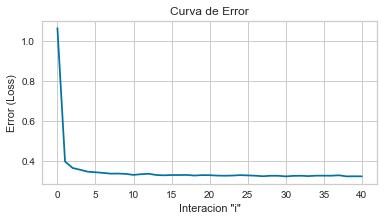



Ver capas entrenadas: 
---------------------

Capa N°  1
Dimension:  (784, 100)


[[-3.59441289e-14  1.29129192e-13  6.64660293e-14 ... -2.07594248e-14
  -1.35966939e-13 -1.12338709e-13]
 [-1.34245064e-13  3.90814447e-14 -5.31868234e-14 ...  1.13771687e-13
   1.10899868e-13  8.01840604e-14]
 [ 4.06919228e-14 -1.19143479e-13 -9.69430307e-14 ... -8.14169878e-14
   3.52079968e-14 -1.18797531e-13]
 ...
 [ 4.19963216e-14 -4.10873138e-14 -2.47085360e-14 ... -1.02825448e-13
  -1.22879644e-13  5.25759789e-14]
 [-5.31844197e-14 -1.37450047e-13 -4.65008668e-14 ...  9.87715533e-14
  -4.38949773e-14  4.17747211e-14]
 [ 1.05606848e-13  7.19730839e-15  5.23719719e-14 ...  8.49548205e-14
  -1.26371104e-13 -6.00531912e-15]]


**********************
Capa N°  2
Dimension:  (100, 60)


[[ 0.17749067  0.07217923 -0.04956509 ... -0.02725065 -0.2668488
   0.16838155]
 [ 0.24853445  0.14391     0.06837333 ... -0.01242934  0.04559496
   0.56915418]
 [-0.04685691 -0.18462342 -0.08998905 ...  0.00283225  0.01

In [101]:
# Ver detalles de parametros y ajustes del modelo entrenado

print('\n\n----------------------')
print('R^2 del modelo: ',np.round(valor*100.0,3),'%')
print('Funcion activacion: ',model.out_activation_)
print('Cantidad de capas: ',model.n_layers_)
print('Numero iteraciones: ',model.n_iter_)
print('Cantidad datos usados: ',model.t_)

############################################################

# Curvas de Error (durante entrenamiento)

loss_curve = model.loss_curve_

print('\n\n----------------------')
plt.figure(figsize=(6,3))
plt.title('Curva de Error')
plt.xlabel('Interacion "i"')
plt.ylabel('Error (Loss)')
plt.plot(loss_curve)
plt.show()

############################################################

# Pesos de capas de neuronas

capas = model.coefs_

i = 1
print('\n\nVer capas entrenadas: ')
print('---------------------\n')
for capa in capas:
    print('Capa N° ',i)
    print('Dimension: ',capa.shape)
    print('\n')
    print(capa)
    i +=1
    print('\n\n**********************')
    
    
# fin    

### uso del modelo para predecir - validar

In [103]:
# Predecir - Aplicar Modelo

valor = model.score(X_test,y_test)
print('\nR^2 de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10 
indices = np.random.randint(0,X_test.shape[0],tamano)

predichos = model.predict_proba(X_test[indices])
predichos = np.round(predichos,3)

print('\nProbabilidades de prediccion: ')
print(predichos)
print('------------------------------')

print('\nClases Prediccion: ')
print(model.predict(X_test[indices]))
print('\nClases Orginales: ')
print(y_test[indices])
print('\n\n')

# fin


R^2 de modelo: 96.57 %
------------------------------

Probabilidades de prediccion: 
[[0.001 0.    0.    0.032 0.    0.941 0.    0.    0.003 0.022]
 [0.    0.    0.    0.001 0.    0.    0.    0.001 0.001 0.996]
 [0.    0.    0.    0.001 0.001 0.001 0.    0.    0.002 0.994]
 [0.    0.001 0.    0.    0.    0.    0.    0.998 0.    0.001]
 [0.005 0.    0.    0.02  0.001 0.852 0.003 0.    0.037 0.082]
 [0.    0.001 0.    0.    0.    0.    0.    0.998 0.    0.   ]
 [0.    0.007 0.986 0.001 0.    0.    0.    0.005 0.001 0.   ]
 [0.002 0.    0.    0.    0.001 0.001 0.996 0.    0.    0.   ]
 [0.    0.997 0.    0.    0.    0.    0.    0.001 0.001 0.   ]
 [0.    0.026 0.97  0.001 0.    0.    0.    0.002 0.    0.   ]]
------------------------------

Clases Prediccion: 
[5 9 9 7 5 7 2 6 1 2]

Clases Orginales: 
[5 9 9 7 5 7 2 6 1 2]





## Clasificador Pipeline + GridSearchCV

In [136]:
# modelo con pipeline

(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(60000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

print('\n')
print('Dim X train: ',X_train.shape)
print('Dim Y train: ',X_test.shape)
print('\n')


# Definir modelo de regression por ANN (modelo inicial)
model = MLPClassifier((100,60,30),
                      activation='logistic',
                      solver='sgd',
                      random_state=42,
                      batch_size = 'auto',
                      max_iter=300,
                      verbose=True,
                      early_stopping=True,
                      learning_rate_init = 0.2,
                      power_t = 0.9,
                      alpha = 0.01, 
                      shuffle=True,
                      epsilon=1e-10,
                      tol=1e-8,
                      n_iter_no_change=15,
                      validation_fraction=0.2)


# entrenar modelos y busqueda mediante GridSearchCV
model.fit(X_train, y_train)

# Grilla de busqueda de mejores parametros para la ANN
param_grid = {
    'hidden_layer_sizes': [(50,20,10),(80,20),(20,10)],
    'activation': ['tanh','logistic'],
    'alpha': [0.0001, 0.05]}

# Gridsearch CV
search = GridSearchCV(model, param_grid,cv=3)

# entrenar modelos y busqueda mediante GridSearchCV
search.fit(X_train, y_train)

# ver ajuste del modelo entrenado
valor = search.score(X_test,y_test)

# Mejores parametros
print('\n\n----------------------------')
print('Mejores parametros: ')
print(search.best_params_)
print('R^2 modelo:' ,np.round(valor*100.0,3),'%')
print('\n\n')

# fin



Dim X train:  (60000, 784)
Dim Y train:  (10000, 784)


Iteration 1, loss = 1.95338825
Validation score: 0.697167
Iteration 2, loss = 0.55263943
Validation score: 0.896167
Iteration 3, loss = 0.31018153
Validation score: 0.936083
Iteration 4, loss = 0.21675932
Validation score: 0.951083
Iteration 5, loss = 0.17170946
Validation score: 0.957000
Iteration 6, loss = 0.14925512
Validation score: 0.962167
Iteration 7, loss = 0.13134458
Validation score: 0.965000
Iteration 8, loss = 0.12018006
Validation score: 0.968500
Iteration 9, loss = 0.11053619
Validation score: 0.966667
Iteration 10, loss = 0.10304859
Validation score: 0.970250
Iteration 11, loss = 0.09625277
Validation score: 0.970833
Iteration 12, loss = 0.09172330
Validation score: 0.968833
Iteration 13, loss = 0.08673835
Validation score: 0.972500
Iteration 14, loss = 0.08299514
Validation score: 0.971083
Iteration 15, loss = 0.07985878
Validation score: 0.972917
Iteration 16, loss = 0.07727703
Validation score: 0.973500
Iterati

In [137]:
# Prediccion

valor = search.score(X_test,y_test)
print('\nR^2 de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(search.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin


R^2 de modelo: 97.59 %
------------------------------

Valores de Prediccion: 
[8 8 1 0 9 7 1 6 0 5]

Valores Orginales: 
[8 8 1 0 9 7 1 6 0 5]





## Clasificador con Keras + Scikit

### Opcion 01 con Keras (Sin GridSearchCV)

In [106]:
# modelo keras

# cargar datos
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizacion entre 0-1
X_train = X_train.reshape(60000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

clases = len(set(y_test))

print('\n\nX_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('-------------------')
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('-------------------')
print('Clases clasificacion: ',clases)
print('\n')

##############################################################################################################################

dimension = X_train.shape[1:]

def crear_modelo(clase=clases,init='glorot_uniform',alpha=0.001): 
    # modelo secuencial
    modeli = keras.Sequential()
    modeli.add(Dense(80,activation='tanh',kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha),input_shape=dimension))
    modeli.add(Dense(40,activation='tanh',kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))
    modeli.add(Dense(20,activation='sigmoid',kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))
    modeli.add(Dense(clase,activation='softmax'))
    
    #compilar y retornar objeto modelo
    modeli.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam' ,metrics=['accuracy'])
    return modeli


##############################################################################################################################

# Callbacks para el entrenamiento
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)

# Parametros de entrenamiento
epochs = 50
#batch_size = 128
shuffle =True
callbacks = [chk,stp,lrs]

##############################################################################################################################

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasClassifier(crear_modelo,epochs=epochs,callbacks=callbacks,shuffle=True,validation_split=0.2)

# entrenar modelo
history = model.fit(X_train, y_train)

#############################################################
####### Ver curvas de Aprendizaje del modelo #############

historia = history.history

print('\n\nCurvas de Aprendizaje\n')
for nombre,valores in historia.items():
    plt.figure(figsize=(8,3))
    plt.title('Curva de ' + nombre)
    plt.xlabel('Interacion "i"')
    plt.ylabel(nombre)
    plt.plot(valores)
    plt.show()

##############################################################

# test de rendimiento - mse
puntaje = model.score(X_test,y_test)
print('\n\nPuntaje total: ',puntaje)

# fin



X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
-------------------
y_train shape:  (60000,)
y_test shape:  (10000,)
-------------------
Clases clasificacion:  10


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
47296/48000 [============================>.] - ETA: 0s - loss: 0.8011 - accuracy: 0.8758
Epoch 00001: val_loss improved from inf to 0.44101, saving model to mejor_modelo_entrenado.h5
48000/48000 [==============================] - 4s 81us/sample - loss: 0.7964 - accuracy: 0.8765 - val_loss: 0.4410 - val_accuracy: 0.9386
Epoch 2/50
47584/48000 [============================>.] - ETA: 0s - loss: 0.3928 - accuracy: 0.9433
Epoch 00002: val_loss improved from 0.44101 to 0.34230, saving model to mejor_modelo_entrenado.h5
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3922 - accuracy: 0.9434 - val_loss: 0.3423 - val_accuracy: 0.9523
Epoch 3/50
47680/48000 [============================>.] - ETA: 0s - loss: 0.3227 - accuracy: 0.9553
Epoch 

In [108]:
# Predecir - Aplicar Modelo

valor = model.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor,2))
print('------------------------------')

# Probar prediccion
tamano = 10  # cantidad de muestras a elegir aleatoriamente
indices = np.random.randint(0,X_test.shape[0],tamano)

print('\nValores de Prediccion: ')
print(np.round(search.predict(X_test[indices]),3))
print('\nValores Orginales: ')
print(np.round(y_test[indices],3))
print('\n\n')

# fin

10000/10000 [==============================] - 1s 59us/sample - loss: 0.1841 - accuracy: 0.9733

Puntaje de modelo: 0.97
------------------------------

Valores de Prediccion: 
10/10 [==============================] - 0s 499us/sample
[4 1 3 0 1 0 0 4 4 7]

Valores Orginales: 
[4 8 3 6 1 0 0 9 4 9]





### Opcion 02 - Keras + GridSearchCV

In [104]:
# modelo GridSearchCV + Pipeline + Keras 

# cargar datos
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizacion entre 0-1
X_train = X_train.reshape(60000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

clases = len(set(y_test))

print('\n\nX_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('-------------------')
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('-------------------')
print('Clases clasificacion: ',clases)
print('\n')

##############################################################################################################################

dimension = X_train.shape[1:]

def crear_modelo(clase=clases,optimizer='sgd',init='glorot_uniform',h1=80,h2=40,h3=20,alpha=0.001,activa='tanh'): 
    # modelo secuencial
    modeli = keras.Sequential()
    modeli.add(Dense(h1,activation=activa,kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha),input_shape=dimension))
    modeli.add(Dense(h2,activation=activa,kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))
    modeli.add(Dense(h3,activation='sigmoid',kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))
    modeli.add(Dense(clase,activation='softmax'))
    
    #compilar y retornar objeto modelo
    modeli.compile(loss='sparse_categorical_crossentropy', optimizer = optimizer ,metrics=['accuracy'])
    return modeli

# Callbacks para el entrenamiento
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)


#####################################
### Parametros de entrenamiento #####
epochs = 25
shuffle =True
callbacks = [chk,stp,lrs]
#batch_size = 128

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasClassifier(crear_modelo,shuffle=True,validation_split=0.2,verbose=1)


# Grilla de busqueda de mejores parametros para la ANN
#optimizers = ['rmsprop', 'adam']
activadores = ['tanh','sigmoid','relu']
#inits = ['glorot_uniform', 'normal']
h1s = [80,40]
h2s = [40,30]
h3s = [10]

# grilla de parametros
param_grid = {'activa':activadores,
             'h1': h1s,
             'h2': h2s,
             'h3': h3s}

# Gridsearch CV
search = GridSearchCV(model, param_grid)

# entrenar modelos y busqueda mediante GridSearchCV
search.fit(X_train, y_train)

# ver ajuste del modelo entrenado
valor = search.score(X_test,y_test)

# Mejores parametros
print('\n\n----------------------------')
print('Mejores parametros: ')
print(search.best_params_)
print('Mejor Puntaje:' ,np.round(valor,3))
print('\n\n')

# fin



X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
-------------------
y_train shape:  (60000,)
y_test shape:  (10000,)
-------------------
Clases clasificacion:  10


Train on 38400 samples, validate on 9600 samples
12000/12000 [==============================] - 0s 37us/sample - loss: 1.7986 - accuracy: 0.6649
Train on 38400 samples, validate on 9600 samples
12000/12000 [==============================] - 0s 36us/sample - loss: 1.8269 - accuracy: 0.6204
Train on 38400 samples, validate on 9600 samples
12000/12000 [==============================] - 0s 40us/sample - loss: 1.8577 - accuracy: 0.6368
Train on 38400 samples, validate on 9600 samples
12000/12000 [==============================] - 0s 38us/sample - loss: 1.9184 - accuracy: 0.6262
Train on 38400 samples, validate on 9600 samples
12000/12000 [==============================] - 0s 36us/sample - loss: 1.9146 - accuracy: 0.5595
Train on 38400 samples, validate on 9600 samples
12000/12000 [==============================] - 0s 

In [105]:
# Predecir - Aplicar Modelo

valor = search.score(X_test,y_test)
print('\nPuntaje de modelo:' ,np.round(valor,2))
print('------------------------------')

# Probar prediccion
tamano = 10 
indices = np.random.randint(0,X_test.shape[0],tamano)

predichos = search.predict_proba(X_test[indices])
predichos = np.round(predichos,3)

print('\nProbabilidades de prediccion: ')
print(predichos)
print('------------------------------')

print('\nClases Prediccion: ')
print(search.predict(X_test[indices]))
print('\nClases Orginales: ')
print(y_test[indices])
print('\n\n')

# fin

10000/10000 [==============================] - 0s 46us/sample - loss: 1.7555 - accuracy: 0.6329

Puntaje de modelo: 0.63
------------------------------
10/10 [==============================] - 0s 2ms/sample

Probabilidades de prediccion: 
[[0.357 0.047 0.208 0.045 0.036 0.102 0.067 0.03  0.051 0.055]
 [0.1   0.023 0.059 0.048 0.233 0.096 0.037 0.089 0.138 0.177]
 [0.038 0.133 0.074 0.06  0.127 0.029 0.067 0.247 0.078 0.146]
 [0.066 0.271 0.148 0.135 0.02  0.053 0.161 0.058 0.045 0.042]
 [0.054 0.298 0.127 0.148 0.017 0.059 0.176 0.045 0.043 0.034]
 [0.029 0.441 0.097 0.083 0.025 0.031 0.103 0.111 0.039 0.041]
 [0.246 0.017 0.089 0.063 0.098 0.206 0.051 0.023 0.118 0.089]
 [0.022 0.294 0.081 0.074 0.055 0.022 0.067 0.243 0.054 0.087]
 [0.308 0.042 0.151 0.059 0.047 0.163 0.077 0.024 0.072 0.057]
 [0.03  0.057 0.044 0.08  0.199 0.052 0.049 0.172 0.129 0.187]]
------------------------------

Clases Prediccion: 
10/10 [==============================] - 0s 399us/sample
[0 4 7 1 1 1 0 1 0 4]

# Clasificador con Keras + Scikit (Con GridSearchCV & Opcion Multicapas)

<br><br><b>Importante !!!</b>: Es vital tener en cuenta que si lo que se quiere es convertir un modelo <b>Keras</b> a uno tipo <b>Scikit</b> para poder aplicar sus bondades como es el GridSearchCV, no se puede usar todos los modelos de Keras, el recomendado o unica opcion es usar <b>keras.Sequential()</b> esto debido a que para el Clasificador le brinda acceso al calculo mediante <b>modelo.predic_proba</b> y <b>modelo.predic</b>, estos son fundamentales en el calculo una vez entrenado (fit) el modelo a los datos.<br><br>

## Opcion Sin GridSearch Multicapas

In [20]:
# modelo keras Multicapas - sin gridsearch

# Definir funcion para facilitar ingreso de funciones de activacion
def activ(funci,canti):
    total=[]
    if(len(canti)==1):
        for funcion in funci:
            for iy in range(canti):
                total.append(funcion)
    elif(len(funci)==len(canti)):
        for ix in range(len(funci)):
            for iy in range(canti[ix]):
                total.append(funci[ix])
    else:
        print('Mal ingresado parametros')
    return total
## Ejemplo: activ(['tanh','sigm'],[2,4]) devuele: ['tanh','tanh','sigm','sigm','sigm','sigm'] .. en la cantidad [2,4] indicada

#############################################################################################################################

# cargar datos
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizacion entre 0-1
X_train = X_train.reshape(60000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

# cantidad de clases detectadas segun los valores enteros que toma la salida
clases = len(set(y_test))

print('\n\nX_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('-------------------')
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('-------------------')
print('Clases clasificacion: ',clases)
print('\n')

##############################################################################################################################

# dimension entrada...se indica en la primera capa de la NN
dimension = X_train.shape[1:]

def crear_modelo_cldeep(optimizer='sgd',h=[30,40,10,10],activa=activ(['tanh','softmax'],[3,1]),from_logits=True,init ='glorot_uniform',alpha=0.001,dropout=0.2): 
    
    # Funcion de activacion "None" equivale a decirle que la activacion es la funcion lineal a(x)=x ... es la funcion lineal pura
    
    # modelo secuencial
    modeli = keras.Sequential()
    
    # definir dimension de entradas
    modeli.add(keras.Input(shape=(dimension)))
    
    # De la primera capa a la penultima
    for ix in range(len(h)-1):
        modeli.add(Dense(h[ix],kernel_initializer=init,kernel_regularizer=keras.regularizers.l2(alpha)))

        # Agregar capa de Drop-Out a capas intermedias con un ratio igual a "dropout"=probabilidad desactivacion de neurona aleatoreamente
        modeli.add(keras.layers.Dropout(rate=dropout))
    
    # Capa de salida o final
    modeli.add(Dense(h[-1],activation=activa[-1]))

    #compilar y retornar objeto modelo
    
    # Se recomienda colocar from_logits = True, dado que en primer lugar esto normalizará la salida a un valor entre 0-1
    # Esto es especialmente util para funciones que no estan entre [0-1] en su salida y se requiere normalizar a valor probabilidad
    # Ademas y punto vital, es que brinda mayor estabilidad numerica a los calculos.
    
    # Seleccionar la perdida (loss) adecuada al tipo de salida que se tenga (salida con valores entre [0-1], o valores enteros {1,2,3,4,..})
    modeli.compile(optimizer = optimizer ,metrics=['accuracy'],loss=keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits))
    return modeli

##############################################################################################################################

# Callbacks para el entrenamiento
direccion = 'mejor_modelo_entrenado.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=10,verbose=2)

# Parametros de entrenamiento
epochs = 40
#dropout= 0.2 # desactivacion/activacion aleatoria de neuronas durante entrenamiento
#batch_size = 128
#shuffle =True
callbacks = [chk,stp,lrs]

#############################################################################################################################
###### CAPAS DE NEURONAS DEL MODELO #######

# Se indican cuantas neuronas por capa se requiere por capa ... cuidado, la ultima capa es la cantidad de salidas. Determinar la cantidad de salidas bien
capas=[60,40,10,clases]  

# estas son las funciones de activacion por cada capa ... cuidado que la ultima capa de activacion es para la capa final del modelo 
activacion = activ(['tanh','softmax'],[3,1])
# activacion=['tanh','tanh','tanh','softmax'] ## opcion equivalente a usar "activ"

############################################################################################################################

# wrapping... de keras a scikit model... esto convierte a model a tipo Scikite (posee .fit() , .predict() ,  .evaluate())
model= tf.keras.wrappers.scikit_learn.KerasClassifier(crear_modelo_cldeep,h=capas,activa=activacion,epochs=epochs,callbacks=callbacks,shuffle=True,validation_split=0.2)

# entrenar modelo
history = model.fit(X_train, y_train)

#############################################################
####### Ver curvas de Aprendizaje del modelo #############

historia = history.history

print('\n\nCurvas de Aprendizaje\n')
for nombre,valores in historia.items():
    plt.figure(figsize=(8,3))
    plt.title('Curva de ' + nombre)
    plt.xlabel('Interacion "i"')
    plt.ylabel(nombre)
    plt.plot(valores)
    plt.show()

##############################################################


# test de rendimiento - mse
puntaje = model.score(X_test,y_test)
print('\n\nPuntaje total: ',puntaje)
print('\n')

# fin



X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
-------------------
y_train shape:  (60000,)
y_test shape:  (10000,)
-------------------
Clases clasificacion:  10


Train on 48000 samples, validate on 12000 samples
Epoch 1/40
47360/48000 [============================>.] - ETA: 0s - loss: 2.2765 - accuracy: 0.4096
Epoch 00001: val_loss improved from inf to 2.03515, saving model to mejor_modelo_entrenado.h5
48000/48000 [==============================] - 4s 79us/sample - loss: 2.2742 - accuracy: 0.4119 - val_loss: 2.0352 - val_accuracy: 0.6364
Epoch 2/40
47776/48000 [============================>.] - ETA: 0s - loss: 2.0436 - accuracy: 0.6234
Epoch 00002: val_loss improved from 2.03515 to 1.92749, saving model to mejor_modelo_entrenado.h5
48000/48000 [==============================] - 3s 69us/sample - loss: 2.0433 - accuracy: 0.6237 - val_loss: 1.9275 - val_accuracy: 0.7287
Epoch 3/40
47968/48000 [============================>.] - ETA: 0s - loss: 1.9610 - accuracy: 0.7022
Epoch 

In [22]:
# Predecir - Aplicar Modelo

valor = model.score(X_test,y_test)
print('\nR^2 de modelo:' ,np.round(valor*100.0,2),'%')
print('------------------------------')

# Probar prediccion
tamano = 10 
indices = np.random.randint(0,X_test.shape[0],tamano)

predichos = model.predict_proba(X_test[indices])
predichos = np.round(predichos,3)

print('\nProbabilidades de prediccion: ')
print(predichos)
print('------------------------------')

print('\nClases Prediccion: ')
print(model.predict(X_test[indices]))
print('\nClases Orginales: ')
print(y_test[indices])
print('\n\n')

# fin

10000/10000 [==============================] - 1s 58us/sample - loss: 1.6146 - accuracy: 0.9197

R^2 de modelo: 91.97 %
------------------------------

Probabilidades de prediccion: 
[[0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.001 0.    0.    0.    0.999 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.06  0.    0.148 0.    0.    0.    0.792 0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.99  0.    0.009 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
------------------------------

Clases Prediccion: 
[8 6 6 1 6 0 1 7 8 1]

Clases Orginales: 
[8 6 6 1 5 0 1 7 8 1]



